In [48]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [49]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [50]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [51]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources\hawaii.sqlite")

In [52]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [53]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [54]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [55]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [56]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The most recent date in the data set is: {recent_date}" )

The most recent date in the data set is: ('2017-08-23',)


In [57]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()


# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(f"The date a year ago from the last date in the data set is: {year_ago}")

The date a year ago from the last date in the data set is: 2016-08-23


In [58]:
# Perform a query to retrieve the data and precipitation scores
session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [59]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_data = pd.read_sql_query(session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).statement, session.bind)
precip_data.set_index('date', inplace=True)
precip_data.dropna(inplace=True)


In [60]:
# Sort the dataframe by date
precip_data.sort_values(by='date', ascending=True, inplace=True)
precip_data

,prcp
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


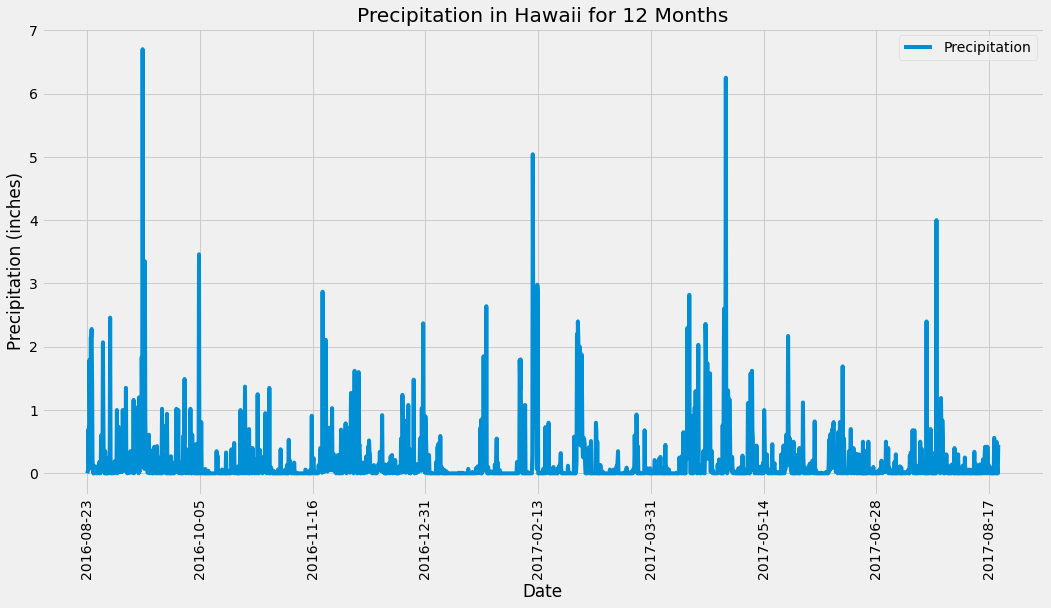

In [61]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_data.plot(figsize=(16,8))
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation in Hawaii for 12 Months')
plt.legend(['Precipitation'])
plt.show()


In [62]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_data.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [63]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Measurement.station).distinct().count()
print(f"The total number of stations in the dataset is: {station_count}")

The total number of stations in the dataset is: 9


In [64]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station_counts = session.query(Measurement.station, func.count(Measurement.id)).\
                                group_by(Measurement.station).\
                                order_by(func.count(Measurement.id).desc()).all()
                                    
print(f"The most active stations in the dataset are: {active_station_counts},") 


The most active stations in the dataset are: [('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)],


In [65]:
# Name of most of active station
most_active_station_name = session.query(Station.name).filter(Station.station == active_station_counts[0][0]).all()
print(f"The most active station name in the dataset is: {most_active_station_name}")

The most active station name in the dataset is: [('WAIHEE 837.5, HI US',)]


In [66]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == active_station_counts[0][0]).all()
print(f"The lowest temperature in the dataset is: {lowest_temp}")
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == active_station_counts[0][0]).all()
print(f"The highest temperature in the dataset is: {highest_temp}")
# Calculate the average temperature by passing the id of the station from the previous query
average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(f"The average temperature in the dataset is: {average_temp}")

The lowest temperature in the dataset is: [(54.0,)]
The highest temperature in the dataset is: [(85.0,)]
The average temperature in the dataset is: [(71.66378066378067,)]


In [67]:
# Using the most active station id Query the last 12 months of temperature observation data for this station
# (i.e. the last 12 months of temperature observation data for the most active station)
active_station_temps = session.query(Measurement.date, Measurement.tobs).order_by(Measurement.date).\
                                filter(Measurement.station == 'USC00519281').\
                                filter(Measurement.date >= year_ago).all()                                      
print(f"The last 12 months of temperature observation data for the most active station are: {active_station_temps}")

The last 12 months of temperature observation data for the most active station are: [('2016-08-23', 77.0), ('2016-08-24', 77.0), ('2016-08-25', 80.0), ('2016-08-26', 80.0), ('2016-08-27', 75.0), ('2016-08-28', 73.0), ('2016-08-29', 78.0), ('2016-08-30', 77.0), ('2016-08-31', 78.0), ('2016-09-01', 80.0), ('2016-09-02', 80.0), ('2016-09-03', 78.0), ('2016-09-04', 78.0), ('2016-09-05', 78.0), ('2016-09-06', 73.0), ('2016-09-07', 74.0), ('2016-09-08', 80.0), ('2016-09-09', 79.0), ('2016-09-10', 77.0), ('2016-09-11', 80.0), ('2016-09-12', 76.0), ('2016-09-13', 79.0), ('2016-09-14', 75.0), ('2016-09-15', 79.0), ('2016-09-16', 78.0), ('2016-09-17', 79.0), ('2016-09-18', 78.0), ('2016-09-19', 78.0), ('2016-09-20', 76.0), ('2016-09-21', 74.0), ('2016-09-22', 77.0), ('2016-09-23', 78.0), ('2016-09-24', 79.0), ('2016-09-25', 79.0), ('2016-09-26', 77.0), ('2016-09-27', 80.0), ('2016-09-28', 78.0), ('2016-09-29', 78.0), ('2016-09-30', 78.0), ('2016-10-01', 77.0), ('2016-10-02', 79.0), ('2016-10-03'

In [68]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_df = pd.DataFrame(active_station_temps, columns=['date', 'tobs'])
active_station_df

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


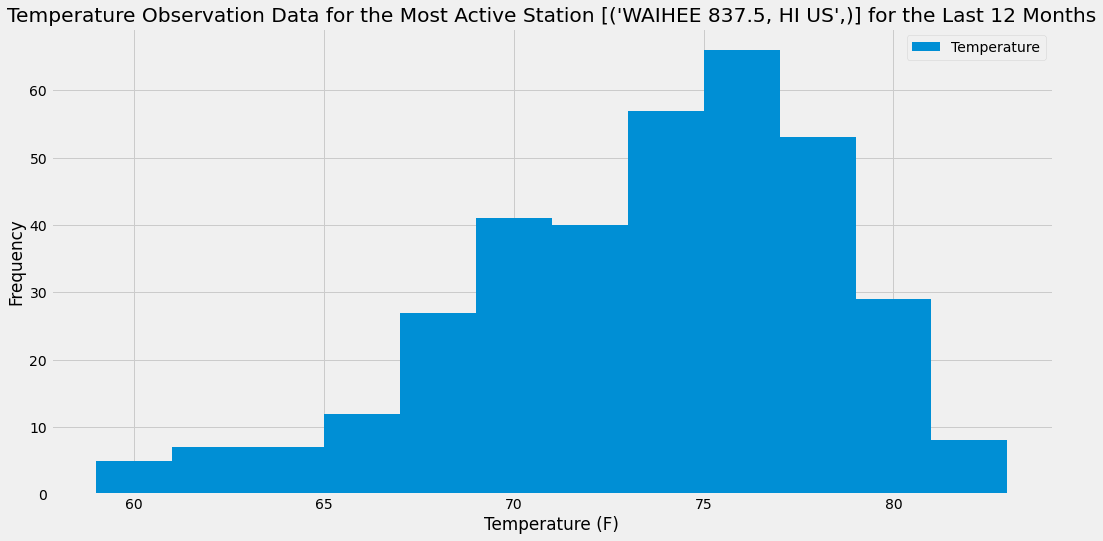

In [69]:
# Plot the histogram
active_station_df.plot(kind='hist', figsize=(16,8), bins=12)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title(f'Temperature Observation Data for the Most Active Station {most_active_station_name} for the Last 12 Months')
plt.legend(['Temperature'])
plt.show()

# Close session

In [70]:
# Close Session
session.close()